In [63]:
library(dplyr)
library(nleqslv)
library(pracma)
library(cubature)
library(ggplot2)
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum0.5.R") 
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve.R") 
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve90.R") 

kernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", stringsAsFactors = F, header=T)


In [57]:
for(j in 1:nrow(kernels)){
    
theta_eval <- kernels$best_theta[j]
k_eval <- kernels$best_k[j]

kernels$MedianDispDist[j] <- round(nleqslv(x = 7, fn = cdf_solve)$x, 2) # answer is stored in $x

}

In [25]:
profile14_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2014.csv", header=T) %>%
        filter(k_eval <=10 & k_eval >=-10 & theta_eval <=5)

min14 <- min(profile14_95$log_like)

profile14_weighted <- profile14_95 %>%
        mutate(deviation=min14/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T)%>%
        mutate(Year="2014")

profile14_weighted$median <- NA

pb <- txtProgressBar(min = 0, max =1000, style = 3)

for(i in 1:nrow(profile14_weighted)){
    
theta_eval <- profile14_weighted$theta_eval[i]
k_eval <- profile14_weighted$k_eval[i]

profile14_weighted$median[i] <- round(nleqslv(x = 7, fn = cdf_solve)$x, 2) 

setTxtProgressBar(pb, i)

}

close(pb)

#write.csv(profile14_weighted, file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MedPdf2014.csv", row.names=F) 



  |======================================================================| 100%


In [58]:
profileall_weighted$Year <- "2012-18" #to make the year label fit on the graph axis
kernels$Year[8] <- "2012-18" #to make the year label fit on the graph axis

all_med <- bind_rows(profile12_weighted, profile13_weighted, profile14_weighted, profile15_weighted, profile16_weighted, profile17_weighted, profile18_weighted, profileall_weighted)
kernels$MedianDispDist_CI95_lower <- c(round(min(profile12_weighted$median), 2), round(min(profile13_weighted$median), 2), round(min(profile14_weighted$median), 2), round(min(profile15_weighted$median), 2), round(min(profile16_weighted$median), 2), round(min(profile17_weighted$median), 2), round(min(profile18_weighted$median),2), round(min(profileall_weighted$median), 2))
kernels$MedianDispDist_CI95_upper <- c(round(max(profile12_weighted$median), 2), round(max(profile13_weighted$median), 2), round(max(profile14_weighted$median), 2), round(max(profile15_weighted$median), 2), round(max(profile16_weighted$median), 2), round(max(profile17_weighted$median), 2), round(max(profile18_weighted$median), 2), round(max(profileall_weighted$median), 2))


In [61]:
for(j in 1:nrow(kernels)){
    
theta_eval <- kernels$best_theta[j]
k_eval <- kernels$best_k[j]

kernels$Dist90Retained[j] <- round(nleqslv(x = 7, fn = cdf_solve90)$x, 2) # answer is stored in $x

}
write.csv(kernels, file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", row.names=F) 


In [60]:
kernels

Year,best_k,best_theta,k_CI95_lower,k_CI95_upper,theta_CI95_lower,theta_CI95_upper,MeanDispDist,MeanDispDist_CI95_lower,MeanDispDist_CI95_upper,NumParentageMatches,NumOffsSampled,PercentAssigned,MedianDispDist,Dist90Retained,MedianDispDist_CI95_lower,MedianDispDist_CI95_upper
2012,-2.36,1.03,-7.22,-1.90,0.48,1.10,10.165094,0.000000,1.367946e+26,3,63,4.76,7.13,23.29,3.19,1.530115e+13
2013,4.04,0.22,3.59,4.06,0.20,0.24,69.586280,7.978681,1.233879e+05,21,150,14.00,12.20,157.36,2.57,2.061640e+03
2014,0.49,0.38,-0.26,0.81,0.37,0.40,15.037515,5.646667,2.204186e+05,13,181,7.18,5.53,38.13,3.02,2.984700e+03
2015,-1.52,0.67,-2.08,-1.13,0.56,0.70,10.180222,6.149556,2.404633e+02,11,111,9.91,5.82,24.91,2.31,1.118000e+01
2016,-3.04,5.00,-3.07,-2.88,2.16,5.00,10.100794,7.600055,1.311733e+01,6,111,5.41,9.63,18.91,5.85,4.458000e+01
2017,2.94,0.26,2.66,3.64,0.23,0.26,29.062101,5.920487,1.172967e+04,13,130,10.00,6.68,69.72,3.03,5.452225e+05
2018,-2.32,1.37,-2.93,-2.15,1.36,1.61,7.191634,4.507346,5.079209e+01,4,45,8.89,5.55,15.72,2.58,1.276000e+01
2012-18,-2.51,1.49,-2.51,-2.48,1.32,1.60,8.153016,7.132250,9.403629e+00,71,791,8.98,6.44,17.58,4.94,8.130000e+00


Warning message:
“Removed 795 rows containing non-finite values (stat_ydensity).”

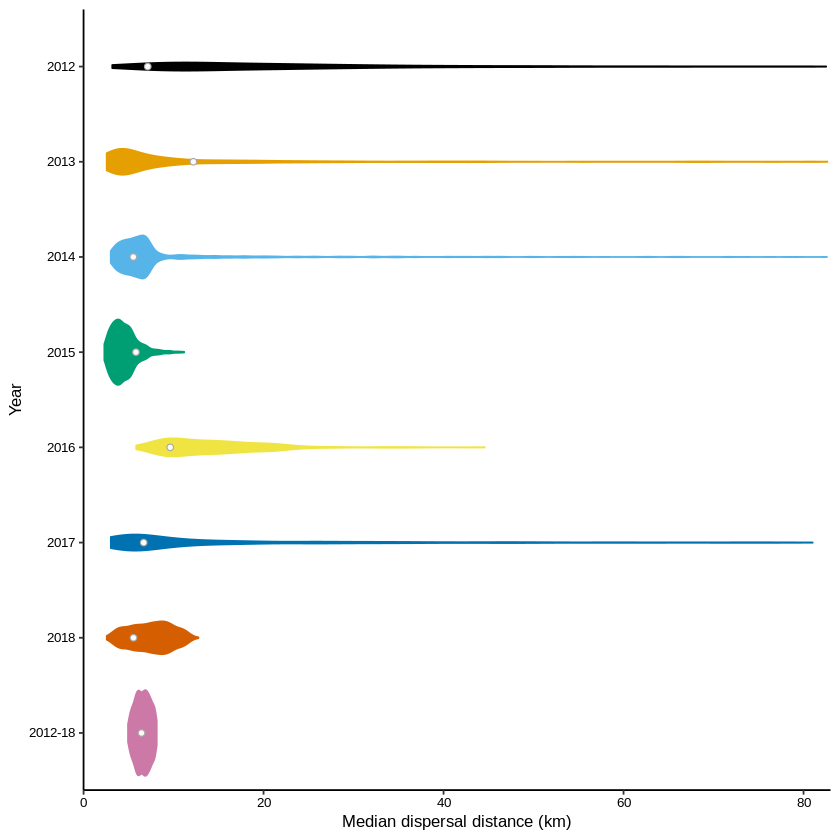

In [62]:
# plot the median distributions
all_med <- all_med %>%
    arrange(Year)%>%
    mutate(Year=factor(Year, levels=c("2012-18", "2018", "2017", "2016", "2015", "2014", "2013", "2012"))) %>%
    arrange(Year)

cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

med_violin <- ggplot(data=all_med, aes(x=Year, y=median, color=Year, fill=Year), alpha=0.5) +
    geom_violin() +
    geom_point(data=kernels, aes(x=Year, y=MedianDispDist), fill="snow",color="darkgray", shape=21) +
    coord_flip() +
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Median dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"),    
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)# +  
    #scale_y_continuous(breaks = 1:6, labels = c(0:200,"break",:8))
    

med_violin
#ggplot2::ggsave(filename="All95CImedianDispDistanceViolin_pub.pdf",  plot=med_violin, width=83, height=70, units="mm", path="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/")
